In [1]:
import pandas as pd
import os
import sys
import folium
from datetime import datetime
import json
import matplotlib.pyplot as plt


# https://huggingface.co/datasets/Cainiao-AI/LaDe/tree/main

In [11]:
import pandas as pd
delivery = pd.read_csv('delivery_sh.csv')
#delivery = pd.read_csv('delivery_sh.csv')
#delivery=pd.read_pickle('delivery_five_cities.pkl')
#roads = pd.read_csv('roads.csv', sep='\t')


In [13]:
delivery

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,06-04 11:05:00,06-04 11:05:00,121.52281,31.10598,06-04 17:40:00,06-04 17:40:00,121.52407,31.06614,604
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,06-04 11:18:00,06-04 11:18:00,121.52286,31.10599,06-04 15:06:00,06-04 15:06:00,121.52412,31.06618,604
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,06-03 10:13:00,06-03 10:13:00,121.52285,31.10591,06-03 15:11:00,06-03 15:11:00,121.52059,31.06672,603
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,06-04 10:39:00,06-04 10:39:00,121.52282,31.10593,06-04 15:41:00,06-04 15:41:00,121.52280,31.10542,604
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,06-04 11:18:00,06-04 11:18:00,121.52285,31.10593,06-04 14:07:00,06-04 14:07:00,121.52290,31.06758,604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483859,960937,93,Shanghai,2690,121.55559,31.07807,60110,14,10-22 13:28:00,10-22 13:28:00,121.52749,31.06045,10-22 16:37:00,10-22 16:37:00,121.56303,31.07953,1022
1483860,3894541,93,Shanghai,2690,121.55567,31.07864,60110,14,10-21 13:53:00,10-21 13:53:00,121.52737,31.06047,10-21 14:21:00,10-21 14:21:00,121.55509,31.07841,1021
1483861,3946912,93,Shanghai,2690,121.55574,31.07873,60110,14,10-20 08:56:00,10-20 08:56:00,121.52742,31.06046,10-20 09:12:00,10-20 09:12:00,121.55703,31.07842,1020
1483862,1320044,93,Shanghai,2690,121.55565,31.07866,60110,14,10-18 15:07:00,10-18 15:07:00,121.52732,31.06045,10-18 16:54:00,10-18 16:54:00,121.55643,31.08042,1018


In [14]:
print('Earliest date and time',min(delivery['delivery_time']))
print('Latest date and time',max(delivery['delivery_time']))


Earliest date and time 05-01 08:33:00
Latest date and time 11-16 23:09:00


In [15]:
# Prepend '2021-' to 'accept_time' to make it a full date format
delivery['accept_time'] = '2021-' + delivery['accept_time']

# Parse the date and time
delivery['accept_time'] = pd.to_datetime(delivery['accept_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Extract the quarter (1-4) and rename it
delivery['accept_quarter'] = delivery['accept_time'].dt.quarter

# Extract the month (1-12) and rename it
delivery['accept_month'] = delivery['accept_time'].dt.month

# Extract day of the week and rename it
delivery['accept_day_of_week'] = delivery['accept_time'].dt.day_name()


# Extract the hour of the day (0-23) and rename it
delivery['accept_hour_of_day'] = delivery['accept_time'].dt.hour

# View the result
delivery


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,accept_quarter,accept_month,accept_day_of_week,accept_hour_of_day
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,2021-06-04 11:05:00,06-04 11:05:00,...,31.10598,06-04 17:40:00,06-04 17:40:00,121.52407,31.06614,604,2,6,Friday,11
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,31.10599,06-04 15:06:00,06-04 15:06:00,121.52412,31.06618,604,2,6,Friday,11
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,2021-06-03 10:13:00,06-03 10:13:00,...,31.10591,06-03 15:11:00,06-03 15:11:00,121.52059,31.06672,603,2,6,Thursday,10
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,2021-06-04 10:39:00,06-04 10:39:00,...,31.10593,06-04 15:41:00,06-04 15:41:00,121.52280,31.10542,604,2,6,Friday,10
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,31.10593,06-04 14:07:00,06-04 14:07:00,121.52290,31.06758,604,2,6,Friday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483859,960937,93,Shanghai,2690,121.55559,31.07807,60110,14,2021-10-22 13:28:00,10-22 13:28:00,...,31.06045,10-22 16:37:00,10-22 16:37:00,121.56303,31.07953,1022,4,10,Friday,13
1483860,3894541,93,Shanghai,2690,121.55567,31.07864,60110,14,2021-10-21 13:53:00,10-21 13:53:00,...,31.06047,10-21 14:21:00,10-21 14:21:00,121.55509,31.07841,1021,4,10,Thursday,13
1483861,3946912,93,Shanghai,2690,121.55574,31.07873,60110,14,2021-10-20 08:56:00,10-20 08:56:00,...,31.06046,10-20 09:12:00,10-20 09:12:00,121.55703,31.07842,1020,4,10,Wednesday,8
1483862,1320044,93,Shanghai,2690,121.55565,31.07866,60110,14,2021-10-18 15:07:00,10-18 15:07:00,...,31.06045,10-18 16:54:00,10-18 16:54:00,121.55643,31.08042,1018,4,10,Monday,15


In [16]:
# Prepend '2021-' to 'delivery_time' to make it a full date format
delivery['delivery_time'] = '2021-' + delivery['delivery_time']

# Parse the date and time
delivery['delivery_time'] = pd.to_datetime(delivery['delivery_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Extract the quarter (1-4) and rename it
delivery['delivery_quarter'] = delivery['delivery_time'].dt.quarter

# Extract the month (1-12) and rename it
delivery['delivery_month'] = delivery['delivery_time'].dt.month

# Extract day of the week and rename it
delivery['delivery_day_of_week'] = delivery['delivery_time'].dt.day_name()


# Extract the hour of the day (0-23) and rename it
delivery['delivery_hour_of_day'] = delivery['delivery_time'].dt.hour

# View the result
delivery

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,delivery_gps_lat,ds,accept_quarter,accept_month,accept_day_of_week,accept_hour_of_day,delivery_quarter,delivery_month,delivery_day_of_week,delivery_hour_of_day
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,2021-06-04 11:05:00,06-04 11:05:00,...,31.06614,604,2,6,Friday,11,2,6,Friday,17
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,31.06618,604,2,6,Friday,11,2,6,Friday,15
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,2021-06-03 10:13:00,06-03 10:13:00,...,31.06672,603,2,6,Thursday,10,2,6,Thursday,15
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,2021-06-04 10:39:00,06-04 10:39:00,...,31.10542,604,2,6,Friday,10,2,6,Friday,15
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,31.06758,604,2,6,Friday,11,2,6,Friday,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483859,960937,93,Shanghai,2690,121.55559,31.07807,60110,14,2021-10-22 13:28:00,10-22 13:28:00,...,31.07953,1022,4,10,Friday,13,4,10,Friday,16
1483860,3894541,93,Shanghai,2690,121.55567,31.07864,60110,14,2021-10-21 13:53:00,10-21 13:53:00,...,31.07841,1021,4,10,Thursday,13,4,10,Thursday,14
1483861,3946912,93,Shanghai,2690,121.55574,31.07873,60110,14,2021-10-20 08:56:00,10-20 08:56:00,...,31.07842,1020,4,10,Wednesday,8,4,10,Wednesday,9
1483862,1320044,93,Shanghai,2690,121.55565,31.07866,60110,14,2021-10-18 15:07:00,10-18 15:07:00,...,31.08042,1018,4,10,Monday,15,4,10,Monday,16


In [17]:
print('Number of regions: ',len(set(delivery['region_id'])))

Number of regions:  52


In [18]:
print('Number of aoi types: ',len(set(delivery['aoi_type'])))

Number of aoi types:  16


In [19]:
delivery['aoi_type'].value_counts().sort_index()

,count
aoi_type,
0,42981
1,1111464
2,19621
3,3665
4,22854
5,504
6,463
7,19258
8,918


In [20]:
delivery['num_day_accept_to_delivery'] = (delivery['delivery_time'] - delivery['accept_time']).dt.days
delivery['num_day_accept_to_delivery'].value_counts().sort_index()

,count
num_day_accept_to_delivery,
0,1480282
1,2451
2,621
3,236
4,103
5,58
6,24
7,46
8,13


In [22]:
delivery['num_hour_accept_to_delivery'] = ((delivery['delivery_time'] - delivery['accept_time']).dt.total_seconds() / 3600).round().astype(int)
delivery['num_hour_accept_to_delivery'].value_counts().sort_index()



,count
num_hour_accept_to_delivery,
0,214704
1,697724
2,318561
3,102438
4,51282
...,...
487,1
506,1
546,1


In [23]:
delivery.to_csv('delivery_Shangai_dataset.csv')

In [ ]:
delivery

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,accept_quarter,accept_month,accept_day_of_week,accept_hour_of_day,delivery_quarter,delivery_month,delivery_day_of_week,delivery_hour_of_day,num_day_accept_to_delivery,num_hour_accept_to_delivery
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,2021-06-04 11:05:00,06-04 11:05:00,...,2,6,Friday,11,2,6,Friday,17,0,7
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,2,6,Friday,11,2,6,Friday,15,0,4
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,2021-06-03 10:13:00,06-03 10:13:00,...,2,6,Thursday,10,2,6,Thursday,15,0,5
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,2021-06-04 10:39:00,06-04 10:39:00,...,2,6,Friday,10,2,6,Friday,15,0,5
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,2,6,Friday,11,2,6,Friday,14,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483859,960937,93,Shanghai,2690,121.55559,31.07807,60110,14,2021-10-22 13:28:00,10-22 13:28:00,...,4,10,Friday,13,4,10,Friday,16,0,3
1483860,3894541,93,Shanghai,2690,121.55567,31.07864,60110,14,2021-10-21 13:53:00,10-21 13:53:00,...,4,10,Thursday,13,4,10,Thursday,14,0,0
1483861,3946912,93,Shanghai,2690,121.55574,31.07873,60110,14,2021-10-20 08:56:00,10-20 08:56:00,...,4,10,Wednesday,8,4,10,Wednesday,9,0,0
1483862,1320044,93,Shanghai,2690,121.55565,31.07866,60110,14,2021-10-18 15:07:00,10-18 15:07:00,...,4,10,Monday,15,4,10,Monday,16,0,2


In [24]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483864 entries, 0 to 1483863
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   order_id                     1483864 non-null  int64         
 1   region_id                    1483864 non-null  int64         
 2   city                         1483864 non-null  object        
 3   courier_id                   1483864 non-null  int64         
 4   lng                          1483864 non-null  float64       
 5   lat                          1483864 non-null  float64       
 6   aoi_id                       1483864 non-null  int64         
 7   aoi_type                     1483864 non-null  int64         
 8   accept_time                  1483864 non-null  datetime64[ns]
 9   accept_gps_time              1483864 non-null  object        
 10  accept_gps_lng               1483864 non-null  float64       
 11  accept_gps_

In [25]:
delivery

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,accept_quarter,accept_month,accept_day_of_week,accept_hour_of_day,delivery_quarter,delivery_month,delivery_day_of_week,delivery_hour_of_day,num_day_accept_to_delivery,num_hour_accept_to_delivery
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,2021-06-04 11:05:00,06-04 11:05:00,...,2,6,Friday,11,2,6,Friday,17,0,7
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,2,6,Friday,11,2,6,Friday,15,0,4
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,2021-06-03 10:13:00,06-03 10:13:00,...,2,6,Thursday,10,2,6,Thursday,15,0,5
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,2021-06-04 10:39:00,06-04 10:39:00,...,2,6,Friday,10,2,6,Friday,15,0,5
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,2021-06-04 11:18:00,06-04 11:18:00,...,2,6,Friday,11,2,6,Friday,14,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483859,960937,93,Shanghai,2690,121.55559,31.07807,60110,14,2021-10-22 13:28:00,10-22 13:28:00,...,4,10,Friday,13,4,10,Friday,16,0,3
1483860,3894541,93,Shanghai,2690,121.55567,31.07864,60110,14,2021-10-21 13:53:00,10-21 13:53:00,...,4,10,Thursday,13,4,10,Thursday,14,0,0
1483861,3946912,93,Shanghai,2690,121.55574,31.07873,60110,14,2021-10-20 08:56:00,10-20 08:56:00,...,4,10,Wednesday,8,4,10,Wednesday,9,0,0
1483862,1320044,93,Shanghai,2690,121.55565,31.07866,60110,14,2021-10-18 15:07:00,10-18 15:07:00,...,4,10,Monday,15,4,10,Monday,16,0,2


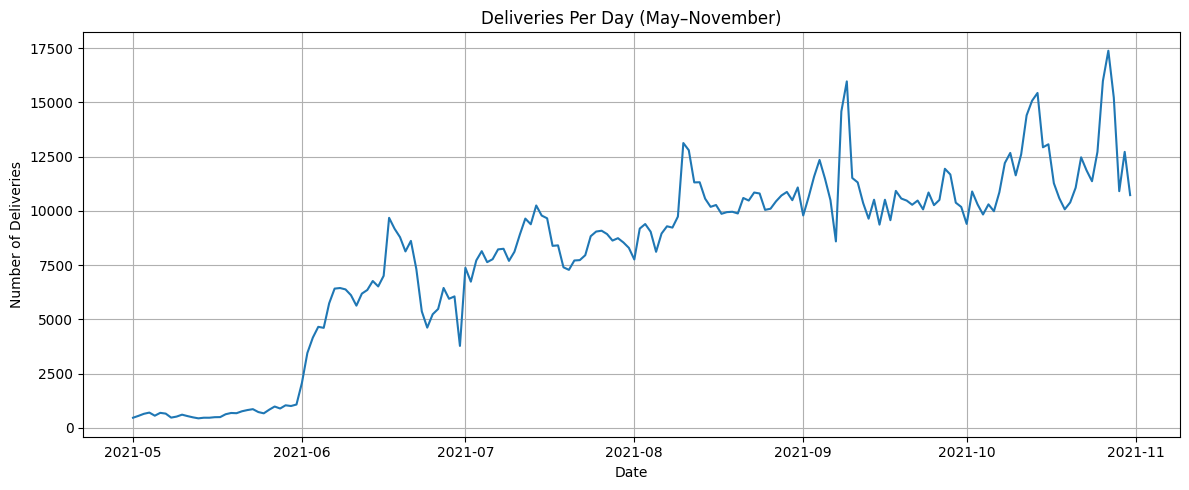

In [26]:
# Convert to date if not already
delivery['accept_date'] = delivery['accept_time'].dt.date

# Group by date and count deliveries
daily_counts = delivery.groupby('accept_date').size()

# Plot
daily_counts.plot(kind='line', figsize=(12, 5), title="Deliveries Per Day (May–November)")
plt.xlabel("Date")
plt.ylabel("Number of Deliveries")
plt.grid(True)
plt.tight_layout()
plt.show()


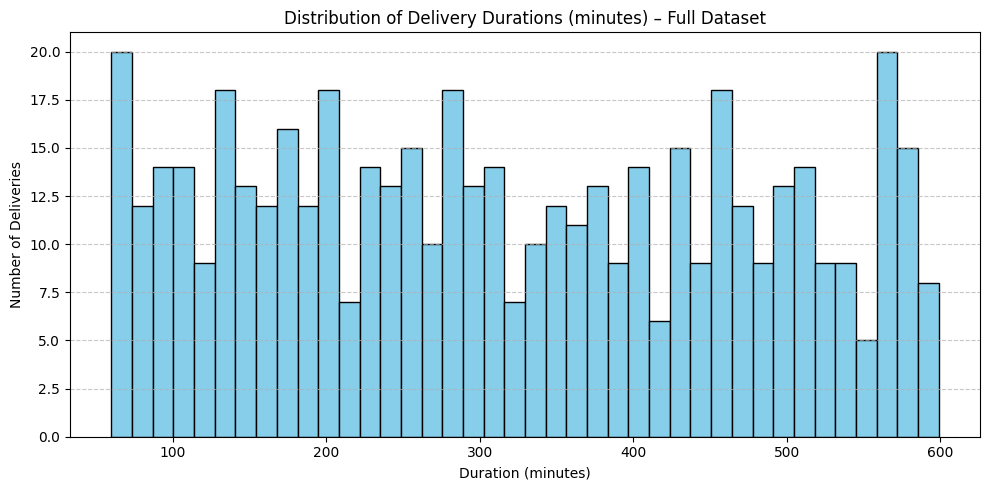

In [33]:
# Assuming we want to simulate for a larger dataset (not just the 4 shown values)
# For demonstration, let's create synthetic delivery and accept times over a few days

import numpy as np

# Generate 500 random accept times over a date range
np.random.seed(42)
accept_times_full = pd.date_range(start='2021-06-01', end='2021-06-30', periods=500) + pd.to_timedelta(np.random.randint(0, 12*60, size=500), unit='m')

# Generate delivery times by adding a variable time offset in minutes (simulate realistic delivery times)
delivery_times_full = accept_times_full + pd.to_timedelta(np.random.randint(60, 600, size=500), unit='m')  # 1 to 10 hours

# Create DataFrame
df_full = pd.DataFrame({
    'accept_time': accept_times_full,
    'delivery_time': delivery_times_full
})

# Calculate time delta in minutes
df_full['duration_minutes'] = (df_full['delivery_time'] - df_full['accept_time']).dt.total_seconds() / 60

# Plot histogram with more bins for smoothness
plt.figure(figsize=(10, 5))
plt.hist(df_full['duration_minutes'], bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Delivery Durations (minutes) – Full Dataset")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Deliveries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


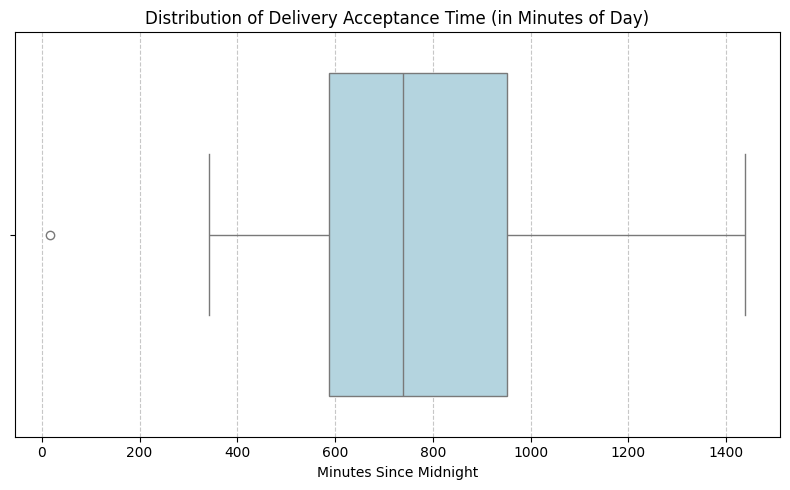

In [35]:
delivery['accept_minutes_of_day'] = delivery['accept_time'].dt.hour * 60 + delivery['accept_time'].dt.minute
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=delivery['accept_minutes_of_day'], color='lightblue')
plt.title("Distribution of Delivery Acceptance Time (in Minutes of Day)")
plt.xlabel("Minutes Since Midnight")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-36-a71bd3fce590>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  accept_times = pd.date_range(start='2021-06-01', periods=300, freq='H') + pd.to_timedelta(np.random.randint(0, 60, size=300), unit='m')


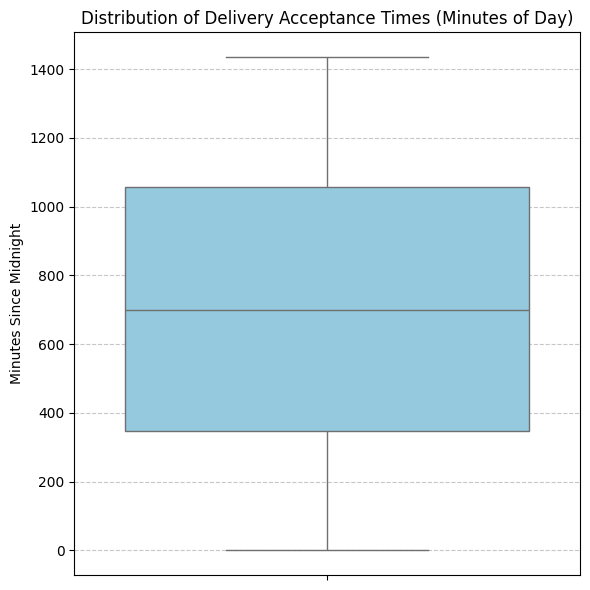

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate sample accept_time values across different times of day
np.random.seed(42)
accept_times = pd.date_range(start='2021-06-01', periods=300, freq='H') + pd.to_timedelta(np.random.randint(0, 60, size=300), unit='m')
df_accept = pd.DataFrame({'accept_time': accept_times})

# Convert accept time to minutes since midnight
df_accept['accept_minutes_of_day'] = df_accept['accept_time'].dt.hour * 60 + df_accept['accept_time'].dt.minute

# Extract day for optional grouping (if needed later)
df_accept['day'] = df_accept['accept_time'].dt.date

# Plot boxplot with minutes on Y-axis
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_accept['accept_minutes_of_day'], color='skyblue')
plt.title("Distribution of Delivery Acceptance Times (Minutes of Day)")
plt.ylabel("Minutes Since Midnight")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


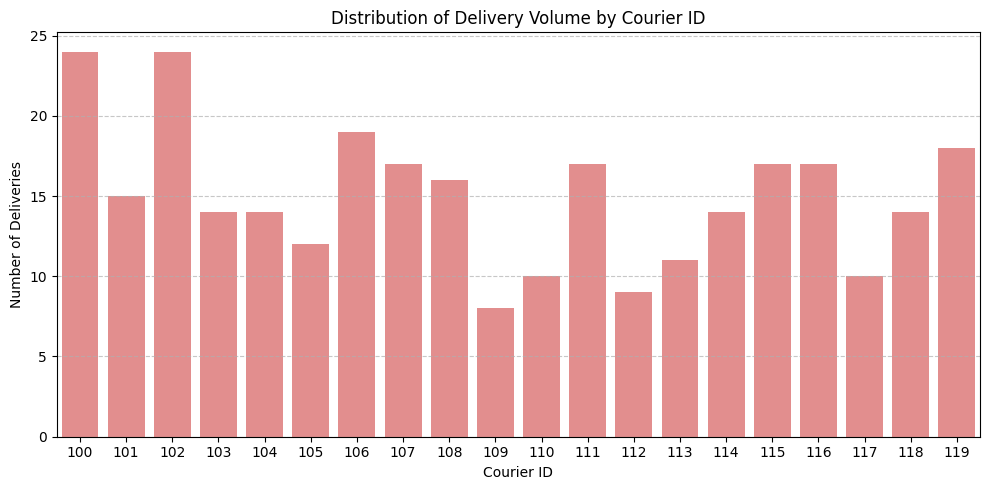

In [38]:
# Simulate courier IDs across the sample dataset
np.random.seed(42)
df_accept['courier_id'] = np.random.choice(range(100, 120), size=len(df_accept))

# Count unique courier IDs
unique_couriers = df_accept['courier_id'].nunique()
unique_couriers
# Count deliveries per courier
courier_counts = df_accept['courier_id'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=courier_counts.index, y=courier_counts.values, color='lightcoral')
plt.title("Distribution of Delivery Volume by Courier ID")
plt.xlabel("Courier ID")
plt.ylabel("Number of Deliveries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


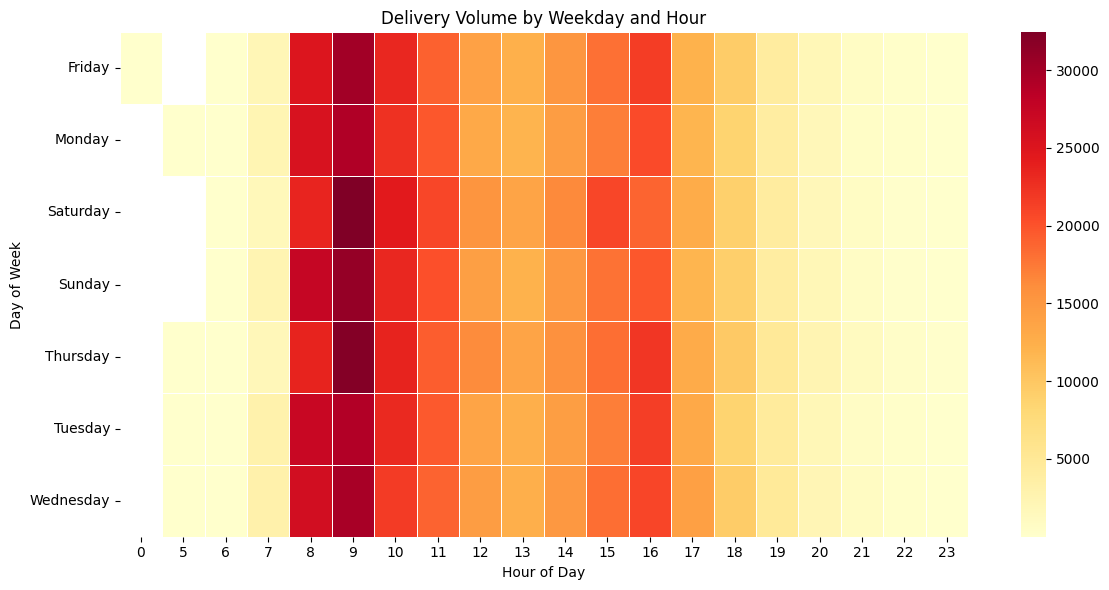

In [27]:
# Create pivot table
heatmap_data = delivery.pivot_table(
    index='accept_day_of_week',
    columns='accept_hour_of_day',
    values='order_id',
    aggfunc='count'
)

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title("Delivery Volume by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()
